48000
575775
(575775, 2)
samples/millisecond   48.0
samples/[%dms]frame   20 960
number of frames   599.765625


Text(0.5, 1.0, 'Channel_2 of the stereo signal ')

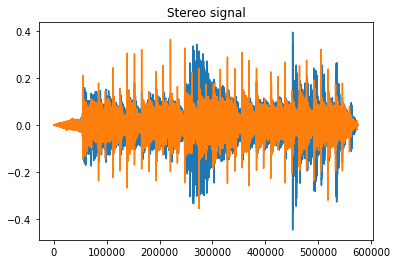

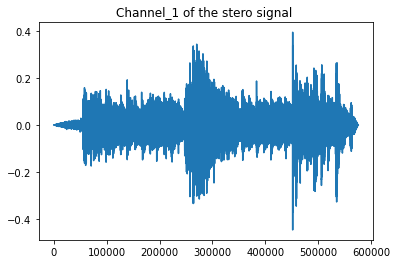

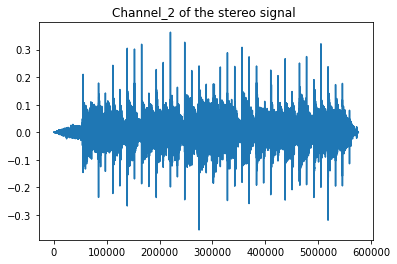

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pywt
import sounddevice as sd
import time
import wave
import soundfile as sf
import IPython.display 

sgn,fs=sf.read("music.wav")
print(fs)
print(len(sgn))
print (sgn.shape)              #tha mou dwsei to megethos tou size tou pinaka tou simatos 
plt.figure(0)
plt.plot(sgn)
plt.title('Stereo signal')     #to sima einai stereo kai vlepoume tin siniparksi 2 diaforetikwn simatwn 
sampsPerMilli = (fs / 1000)
millisPerFrame = 20
sampsPerFrame= int(sampsPerMilli * millisPerFrame)
nFrames = (len(sgn) / sampsPerFrame) # number of non-overlapping _full_ frames
 
print ('samples/millisecond  ', sampsPerMilli)
print ('samples/[%dms]frame  ', millisPerFrame, sampsPerFrame)
print ('number of frames  ', nFrames)

channel1=sgn[:,0]
channel2=sgn[:,1]
plt.figure(1)
plt.plot(channel1)
plt.title('Channel_1 of the stero signal ')

# Set the second subplot as active, and make the second plot.
plt.figure(2)
plt.plot(channel2)
plt.title('Channel_2 of the stereo signal ')





samples/millisecond   48.0
samples/[%dms]frame   20 960
number of frames of channel 1:  599.765625
samples/millisecond   48.0
samples/[%dms]frame   30 1440
number of frames of channel 1:  399.84375
samples/millisecond   48.0
samples/[%dms]frame   40 1920
number of frames of channel 1:  299.8828125
samples/millisecond   48.0
samples/[%dms]frame   50 2400
number of frames of channel 1:  239.90625


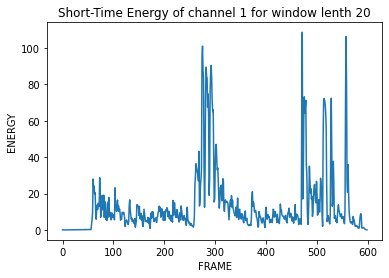

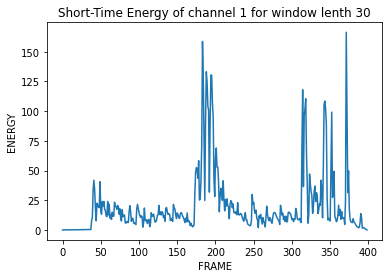

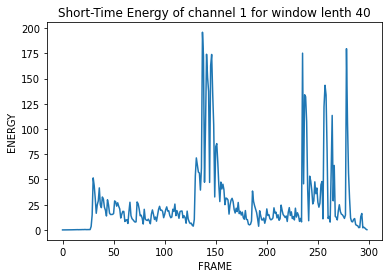

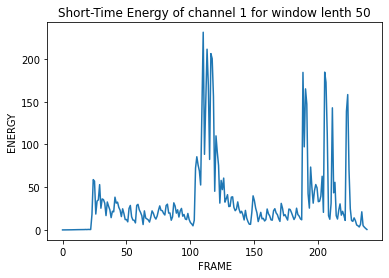

In [2]:
channel1=channel1/ max(abs(channel1))

sampsPerMilli = (fs / 1000)
millisPerFrame = 20
counter=0
while millisPerFrame<=50:
    sampsPerFrame= int(sampsPerMilli * millisPerFrame)
    nFrames1 = (len(channel1) / sampsPerFrame) # number of non-overlapping _full_ frames
    print ('samples/millisecond  ', sampsPerMilli)
    print ('samples/[%dms]frame  ', millisPerFrame, sampsPerFrame)
    print ('number of frames of channel 1: ', nFrames1)   
    STEs = []                                      # list of short-time energies
    for k in range(int(nFrames1)):
        startIdx = k * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        window = np.zeros(channel1.shape)#διμιουργούμε μηδενικό πήνακα ιδιων δυαστάσεων με τον signal
        window[startIdx:stopIdx] = 1       # dimiourgoume to mikos pou 8eloume (n-m)
        STE = sum((channel1 ** 2) * window )
        STEs.append(STE)
    plt.figure(counter)
    plt.plot(STEs)
    plt.title('Short-Time Energy of channel 1 for window lenth %i' %millisPerFrame)
    plt.ylabel('ENERGY')
    plt.xlabel('FRAME')
    counter+=1
    millisPerFrame+=10
    

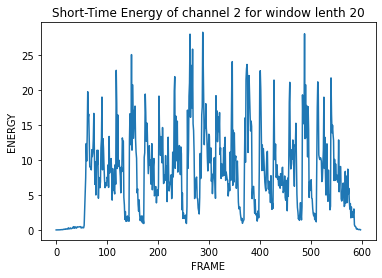

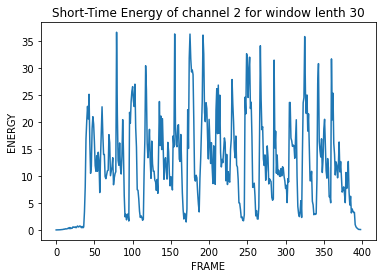

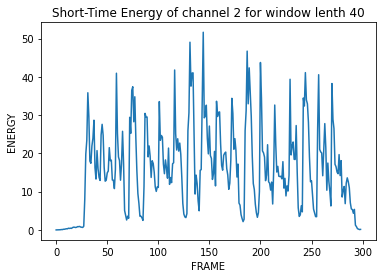

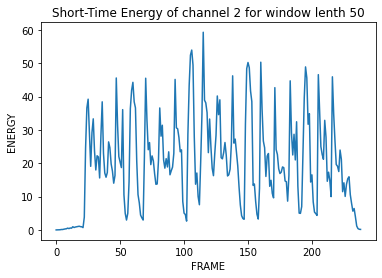

In [3]:
channel2=channel2/ max(abs(channel2))

sampsPerMilli = (fs / 1000)
millisPerFrame = 20
counter=0
while millisPerFrame<=50:
    sampsPerFrame= int(sampsPerMilli * millisPerFrame)
    nFrames2 = (len(channel2) / sampsPerFrame) # number of non-overlapping _full_ frames
    STEs = []                                      # list of short-time energies
    for k in range(int(nFrames2)):
        startIdx = k * sampsPerFrame
        stopIdx = startIdx + sampsPerFrame
        window = np.zeros(channel1.shape)#διμιουργούμε μηδενικό πήνακα ιδιων δυαστάσεων με τον signal
        window[startIdx:stopIdx] = 1       # dimiourgoume to mikos pou 8eloume (n-m)
        STE = sum((channel2 ** 2) * window )
        STEs.append(STE)
    plt.figure(counter)
    plt.plot(STEs)
    plt.title('Short-Time Energy of channel 2 for window lenth %i' %millisPerFrame)
    plt.ylabel('ENERGY')
    plt.xlabel('FRAME')
    counter+=1
    millisPerFrame+=10
    